In [325]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [326]:
# reading the dataset

df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Dictionary  

- `id`: unique identifier  
- `gender`: "Male", "Female" or "Other"  
- `age`: age of the patient  
- `hypertension`: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension  
- `heart_disease`: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease  
- `ever_married`: "No" or "Yes"  
- `work_type`: "children", "Govt_job", "Never_worked", "Private" or "Self-employed"  
- `Residence_type`: "Rural" or "Urban"  
- `avg_glucose_level`: average glucose level in blood  
- `bmi`: body mass index  
- `smoking_status`: "formerly smoked", "never smoked", "smokes" or "Unknown"  
- `stroke`: 1 if the patient had a stroke, 0 otherwise  or 0 if not

In [328]:
df.shape

(5110, 12)

This dataset has 5110 rows and 12 columns.

In [330]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [331]:
# obtaining statistical information for the non - numerical columns

df[df.dtypes[df.dtypes == 'object'].index].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [332]:
# obtaining statistical information for the numerical columns

df[df.dtypes[df.dtypes != 'object'].index].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# Data Cleaning

In [334]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [335]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [336]:
df.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [337]:
df[df.gender == "Other"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [338]:
# Dropping the other gender

df = df[df.gender != "Other"]

In [339]:
df[df.bmi.isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


### `age` column 

The age column should be of integer type but has float values which is very insignificant, so it needs to be converted to integer value.

In [341]:
df.age = df.age.apply(lambda x: np.around(x, decimals = 0))
df.age

0       67.0
1       61.0
2       80.0
3       49.0
4       79.0
        ... 
5105    80.0
5106    81.0
5107    35.0
5108    51.0
5109    44.0
Name: age, Length: 5109, dtype: float64

In [342]:
df[df.age < 1]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
564,61511,Female,0.0,0,0,No,children,Rural,73.71,16.2,Unknown,0
996,53279,Male,0.0,0,0,No,children,Rural,118.87,16.3,Unknown,0
1093,66772,Female,0.0,0,0,No,children,Rural,55.86,16.0,Unknown,0
1600,40544,Male,0.0,0,0,No,children,Urban,109.56,14.3,Unknown,0
1614,47350,Female,0.0,0,0,No,children,Urban,139.67,14.1,Unknown,0
1999,42500,Male,0.0,0,0,No,children,Rural,146.97,18.5,Unknown,0
2030,38920,Male,0.0,0,0,No,children,Urban,73.02,NaN,Unknown,0
2579,68382,Male,0.0,0,0,No,children,Urban,127.78,20.8,Unknown,0
2898,64974,Male,0.0,0,0,No,children,Urban,58.35,18.6,Unknown,0
3295,29955,Male,0.0,0,0,No,children,Rural,70.33,16.9,Unknown,0


In [354]:
df.age = df.age.astype('int')

### `smoking_status`column

Replacing children smoking status to never smoked.

In [356]:
df[df['smoking_status'] == "Unknown"]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
8,27419,Female,59,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
13,8213,Male,78,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
23,64778,Male,82,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5098,579,Male,9,0,0,No,children,Urban,71.88,17.5,Unknown,0
5101,36901,Female,45,0,0,Yes,Private,Urban,97.95,24.5,Unknown,0
5103,22127,Female,18,0,0,No,Private,Urban,82.85,46.9,Unknown,0
5104,14180,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0


In [357]:
df[df['smoking_status'] == "Unknown"].work_type.value_counts()

work_type
Private          640
children         618
Self-employed    156
Govt_job         122
Never_worked       8
Name: count, dtype: int64

In [358]:
# children smokers

df[df.work_type == "children"].smoking_status.value_counts()

smoking_status
Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: count, dtype: int64

In [359]:
df[(df.work_type == "children") & (df.smoking_status.isin(["formerly smoked", "smokes"]))]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1389,68235,Male,12,0,0,No,children,Rural,86.00,20.1,formerly smoked,0
1512,4833,Female,12,0,0,No,children,Rural,207.45,25.4,smokes,0
1686,37698,Female,15,0,0,No,children,Urban,87.96,21.5,formerly smoked,0
1774,57109,Female,12,0,0,No,children,Rural,81.66,23.5,formerly smoked,0
1833,34958,Male,14,0,0,No,children,Urban,92.86,20.7,formerly smoked,0
1866,25305,Male,10,0,0,No,children,Rural,99.87,NaN,formerly smoked,0
2013,64128,Male,10,0,0,No,children,Urban,63.08,20.5,smokes,0
2450,54253,Male,11,0,0,No,children,Urban,144.08,16.2,formerly smoked,0
2526,62454,Female,12,0,0,No,children,Urban,63.98,21.2,formerly smoked,0
3044,17198,Female,10,0,0,No,children,Rural,83.37,17.8,formerly smoked,0


Out the two children smokers one is a Female of age 12 and the other one is a Male of age 10 years old. But the data seems to be have been collected wrong as children with no stable income can't smoke regularly also for the children who have smoked formerly, does make sense how much did they smoke. So in conclusion all children below the age 18 should be replaced with *never smoked*.

In [361]:
df[(df.work_type == "children") & (df.age < 18)].smoking_status.value_counts()

smoking_status
Unknown            618
never smoked        54
formerly smoked     13
smokes               2
Name: count, dtype: int64

In [362]:
df.loc[
    (df.work_type == "children") & (df.age < 18) & 
    (df.smoking_status.isin(['Unknown', 'formerly smoked', 'smokes'])),
    'smoking_status'
] = 'never smoked'


In [363]:
df[(df.work_type == "children") & (df.age < 18)].smoking_status.value_counts()

smoking_status
never smoked    687
Name: count, dtype: int64

In [364]:
df[(df.work_type == "children") & (df.age < 18)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
162,69768,Female,1,0,0,No,children,Urban,70.37,NaN,never smoked,1
245,49669,Female,14,0,0,No,children,Rural,57.93,30.9,never smoked,1
249,30669,Male,3,0,0,No,children,Rural,95.12,18.0,never smoked,0
282,33759,Female,3,0,0,No,children,Urban,73.74,16.0,never smoked,0
290,55680,Male,13,0,0,No,children,Urban,114.84,18.3,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5089,56714,Female,1,0,0,No,children,Rural,62.13,16.8,never smoked,0
5094,28048,Male,13,0,0,No,children,Urban,82.38,24.3,never smoked,0
5095,68598,Male,1,0,0,No,children,Rural,79.15,17.4,never smoked,0
5098,579,Male,9,0,0,No,children,Urban,71.88,17.5,never smoked,0


In [365]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### `bmi` column

Imputing missing values

In [386]:
# Creating age groups
df['age_group'] = pd.cut(df['age'], bins=[-1, 30, 50, 70, 100], labels=['<30', '30-50', '50-70', '70+'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,50-70
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.417448,never smoked,1,50-70
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,70+
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,30-50
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,70+


In [388]:
df.bmi = df.groupby(['gender', 'age_group'])['bmi'].transform(lambda x: x.fillna(x.mean()))


In [389]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_group            0
dtype: int64

# Data Visualization

###  Univariate Analysis 

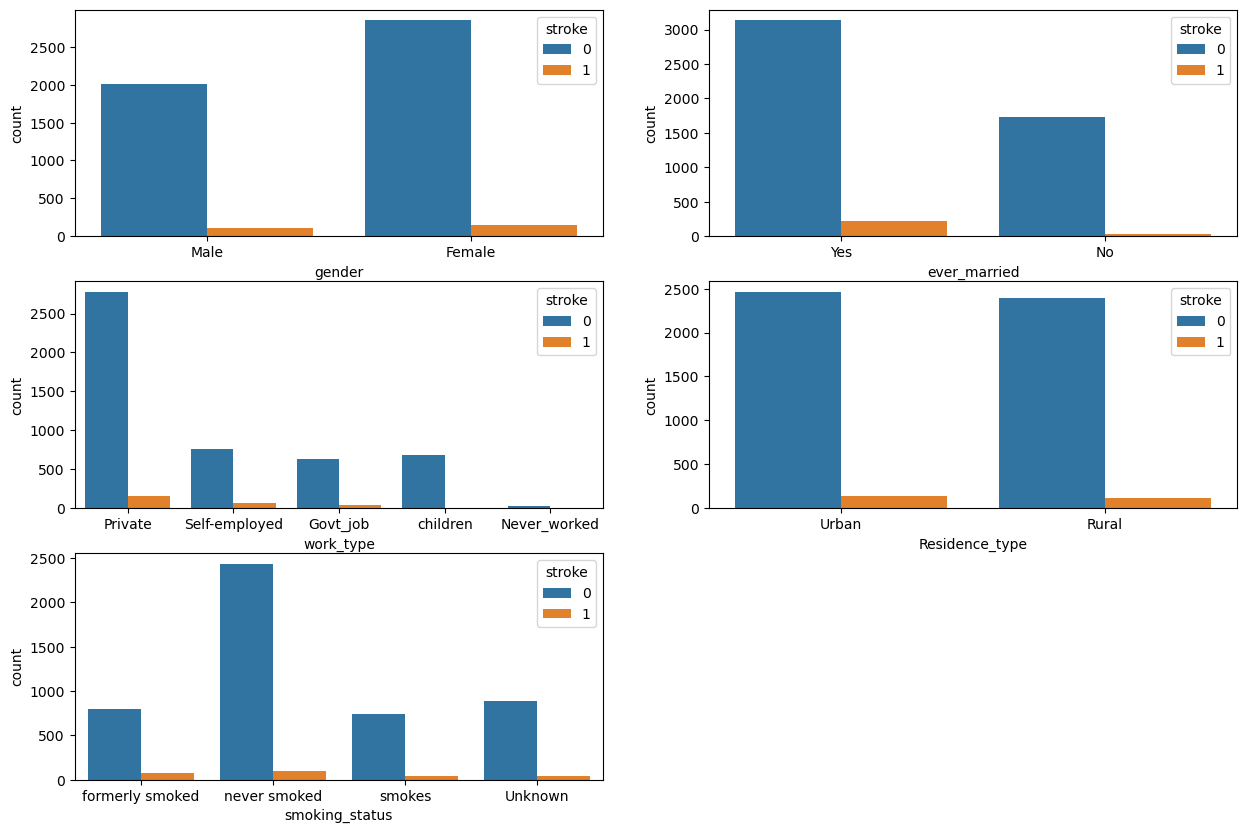

In [422]:
plt.figure(figsize = (15, 10))

plt.subplot(3, 2, 1)
sns.countplot(df, x = "gender", hue = "stroke" )

plt.subplot(3, 2, 2)
sns.countplot(df, x = "ever_married", hue = "stroke" )

plt.subplot(3, 2, 3)
sns.countplot(df, x = "work_type", hue = "stroke" )

plt.subplot(3, 2, 4)
sns.countplot(df, x = "Residence_type", hue = "stroke" )

plt.subplot(3, 2, 5)
sns.countplot(df, x = "smoking_status", hue = "stroke" )

plt.show()

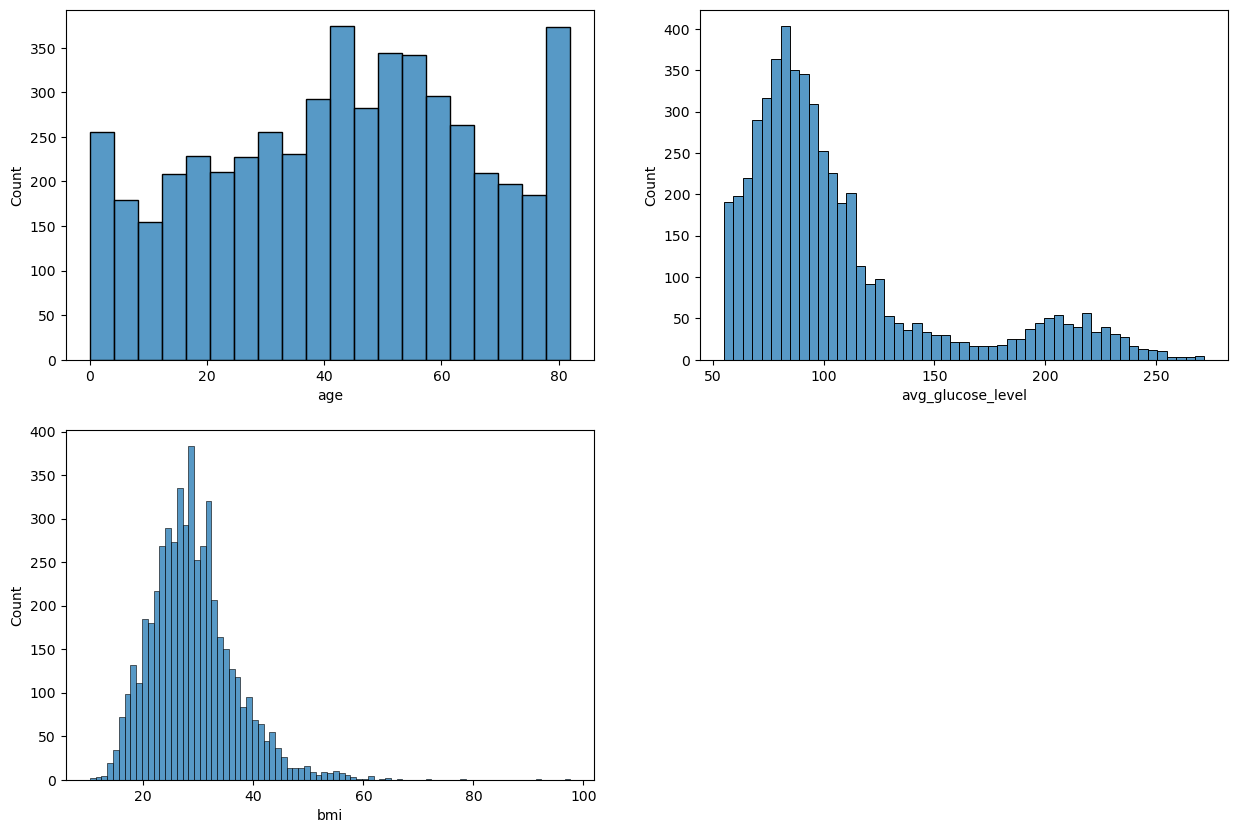

In [428]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
sns.histplot(df, x = "age")

plt.subplot(2, 2, 2)
sns.histplot(df, x = "avg_glucose_level")

plt.subplot(2, 2, 3)
sns.histplot(df, x = "bmi" )

plt.show()

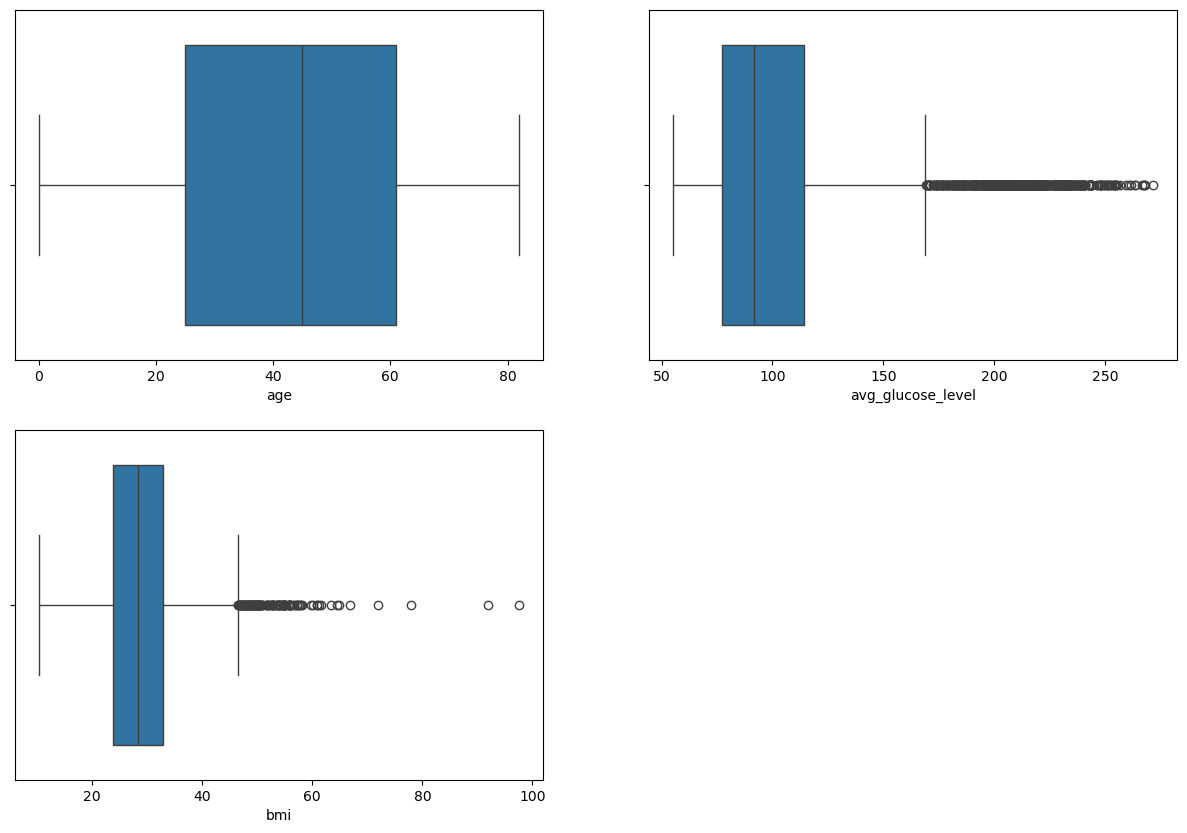

In [430]:
plt.figure(figsize = (15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(df, x = "age")

plt.subplot(2, 2, 2)
sns.boxplot(df, x = "avg_glucose_level")

plt.subplot(2, 2, 3)
sns.boxplot(df, x = "bmi" )

plt.show()

<Axes: xlabel='age', ylabel='Count'>

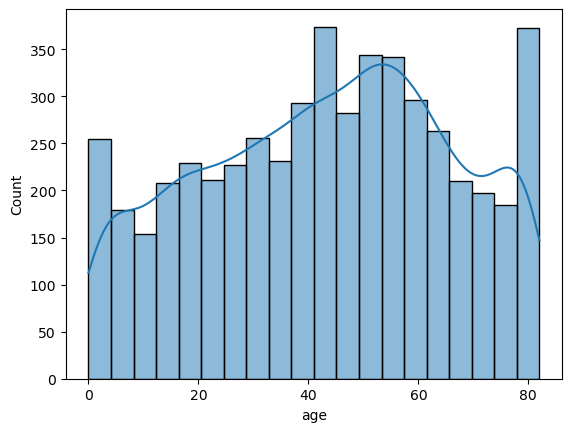

In [501]:
sns.histplot(df['age'], kde=True)

<Axes: xlabel='smoking_status', ylabel='count'>

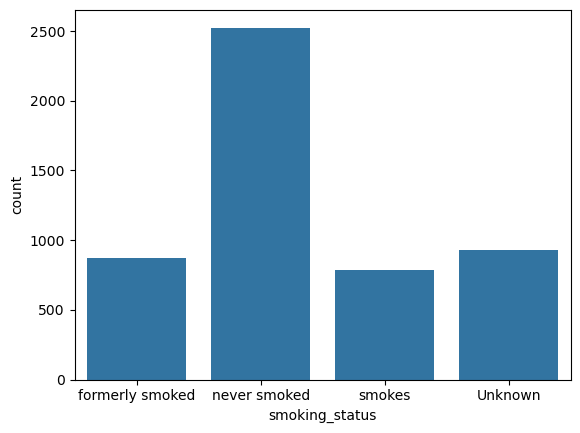

In [503]:
sns.countplot(x='smoking_status', data=df)


### Bivariate Analysis

In [437]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,50-70
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.417448,never smoked,1,50-70
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,70+
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,30-50
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,70+


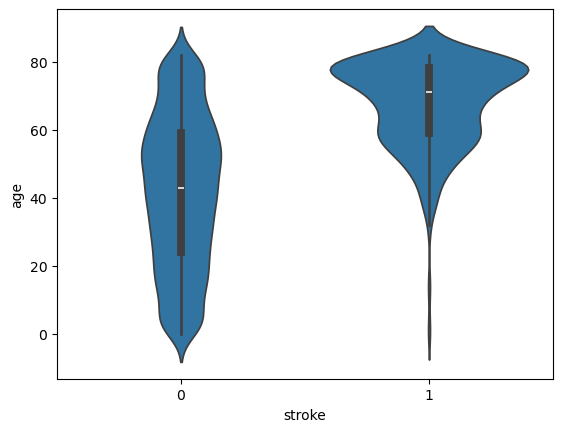

In [518]:
sns.violinplot(df, x='stroke', y='age')
plt.show()

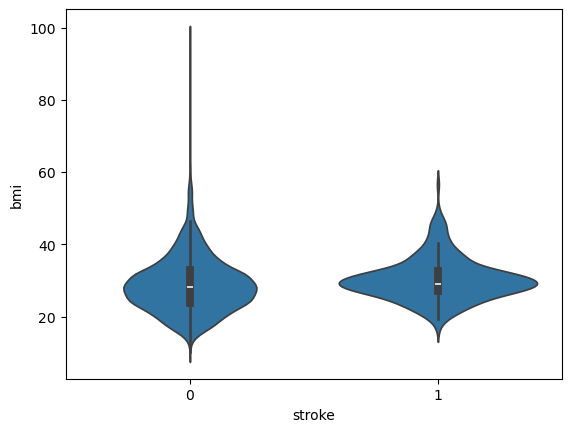

In [520]:
sns.violinplot(x='stroke', y='bmi', data=df)
plt.show()

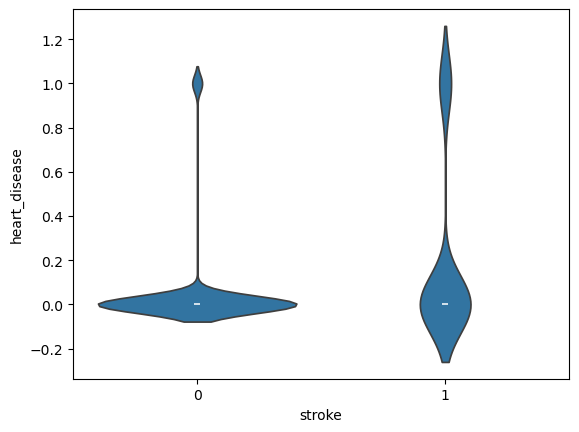

In [528]:
sns.violinplot(x='stroke', y='heart_disease', data=df)
plt.show()

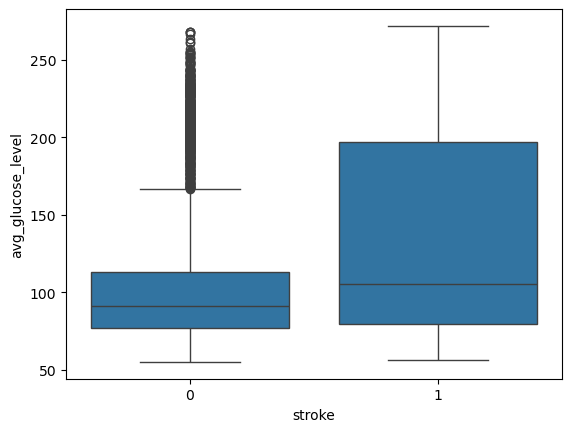

In [522]:
sns.boxplot(df, x='stroke', y='avg_glucose_level')
plt.show()

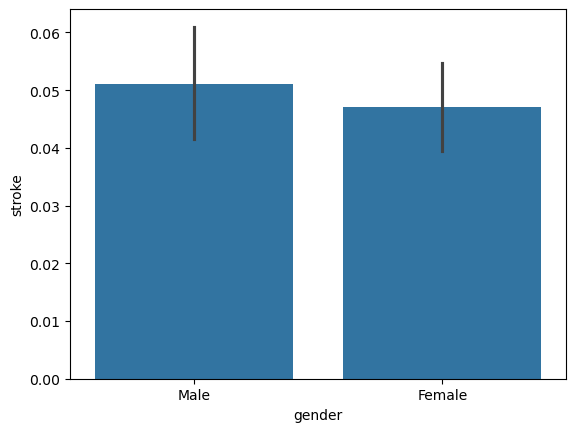

In [524]:
sns.barplot(df, x='gender', y='stroke')

plt.show()

In [507]:
pd.crosstab(df['smoking_status'], df['stroke'], normalize='index') * 100


stroke,0,1
smoking_status,,
Unknown,95.140389,4.859611
formerly smoked,91.963261,8.036739
never smoked,96.356436,3.643564
smokes,94.663278,5.336722


### Correlation Analysis

In [476]:
df.dtypes

id                      int64
gender                 object
age                     int32
hypertension            int64
heart_disease           int64
ever_married           object
work_type              object
Residence_type         object
avg_glucose_level     float64
bmi                   float64
smoking_status         object
stroke                  int64
age_group            category
dtype: object

In [478]:
 df.select_dtypes(exclude=['object', 'category']).corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003648,0.003610,-0.001253,0.000943,0.002147,0.006430
age,0.003648,1.000000,0.276366,0.263776,0.238331,0.327140,0.245225
hypertension,0.003610,0.276366,1.000000,0.108292,0.174540,0.163497,0.127891
heart_disease,-0.001253,0.263776,0.108292,1.000000,0.161907,0.042257,0.134905
avg_glucose_level,0.000943,0.238331,0.174540,0.161907,1.000000,0.172951,0.131991
bmi,0.002147,0.327140,0.163497,0.042257,0.172951,1.000000,0.041613
stroke,0.006430,0.245225,0.127891,0.134905,0.131991,0.041613,1.000000


`id` column is not necessary for the analysis so it needs to be dropped.

In [483]:
df.drop('id', axis = 1, inplace = True)

<Axes: >

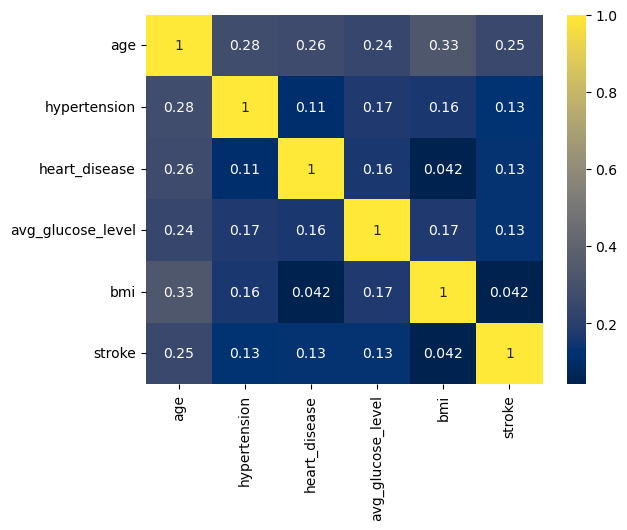

In [499]:
sns.heatmap( df.select_dtypes(exclude=['object', 'category']).corr(), annot = True, cmap = 'cividis')

##  Final Project Summary: Stroke Risk Factors EDA

###  Objective:
The goal of this project was to explore patient-level healthcare data to uncover patterns and risk factors associated with strokes. Using the "Stroke Prediction Dataset" from Kaggle, we conducted extensive exploratory data analysis (EDA) to understand how various features like age, glucose level, BMI, hypertension, and lifestyle factors influence stroke occurrence.

---

###  Data Cleaning Highlights:
- Removed entries with ambiguous gender ("Other")
- Handled missing values in the `bmi` column using group-wise imputation based on age and gender
- Cleaned and recoded the `smoking_status` of minors based on realistic assumptions
- Converted float ages to integers and created meaningful `age_group` bins

---

###  Key Insights from EDA:
- **Age** is the most influential factor: Stroke rates significantly increase in older age groups (especially 50+).
- Patients with **hypertension** and **heart disease** are at much higher risk of stroke.
- Higher **average glucose levels** and **BMI** correlate with higher stroke occurrence.
- Stroke rates are slightly higher among the **married**, **self-employed**, and **urban** populations.
- Children (<18) were present in the dataset with smoking history — cleaned and corrected to reflect likely real-world behavior.

---

###  Visual Storytelling:
- Created histograms, boxplots, violinplots, and heatmaps to visually communicate data distributions and relationships.
- Used group-wise bar plots and KDEs to show stroke likelihood across demographic and medical features.
- Heatmap analysis revealed strong correlation of stroke with age, glucose levels, and comorbidities.

---

###  Business Relevance:
This analysis helps identify key patient segments at high risk for stroke. Healthcare providers can use such insights for early intervention strategies and public health planning. The patterns uncovered here provide a strong foundation for predictive modeling (e.g., logistic regression) in future work.



